In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="whpIkdffQF4Pf2ngIPpV")
project = rf.workspace("project-qlmwa").project("number-fuieb")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to number-1 in yolov11:: 100%|██████████| 7590/7590 [00:01<00:00, 3798.36it/s]


In [4]:
def write_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)
text="""
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'l', 'undefined', 'x']

nc: 13


test: /content/number-1/test
train: /content/number-1/train/images
val: /content/number-1/valid/images

"""

write_text_to_file(text, "output.yaml")

In [5]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 878.7/878.7 kB 25.1 MB/s eta 0:00:00


In [6]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [7]:
!yolo task= detect mode= train data=/content/number-1/data.yaml model=yolov10s.pt epochs=15 imgsz=640 batch=16

100% 15.9M/15.9M [00:00<00:00, 103MB/s] 
Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/number-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [8]:
from IPython.display import Image, display

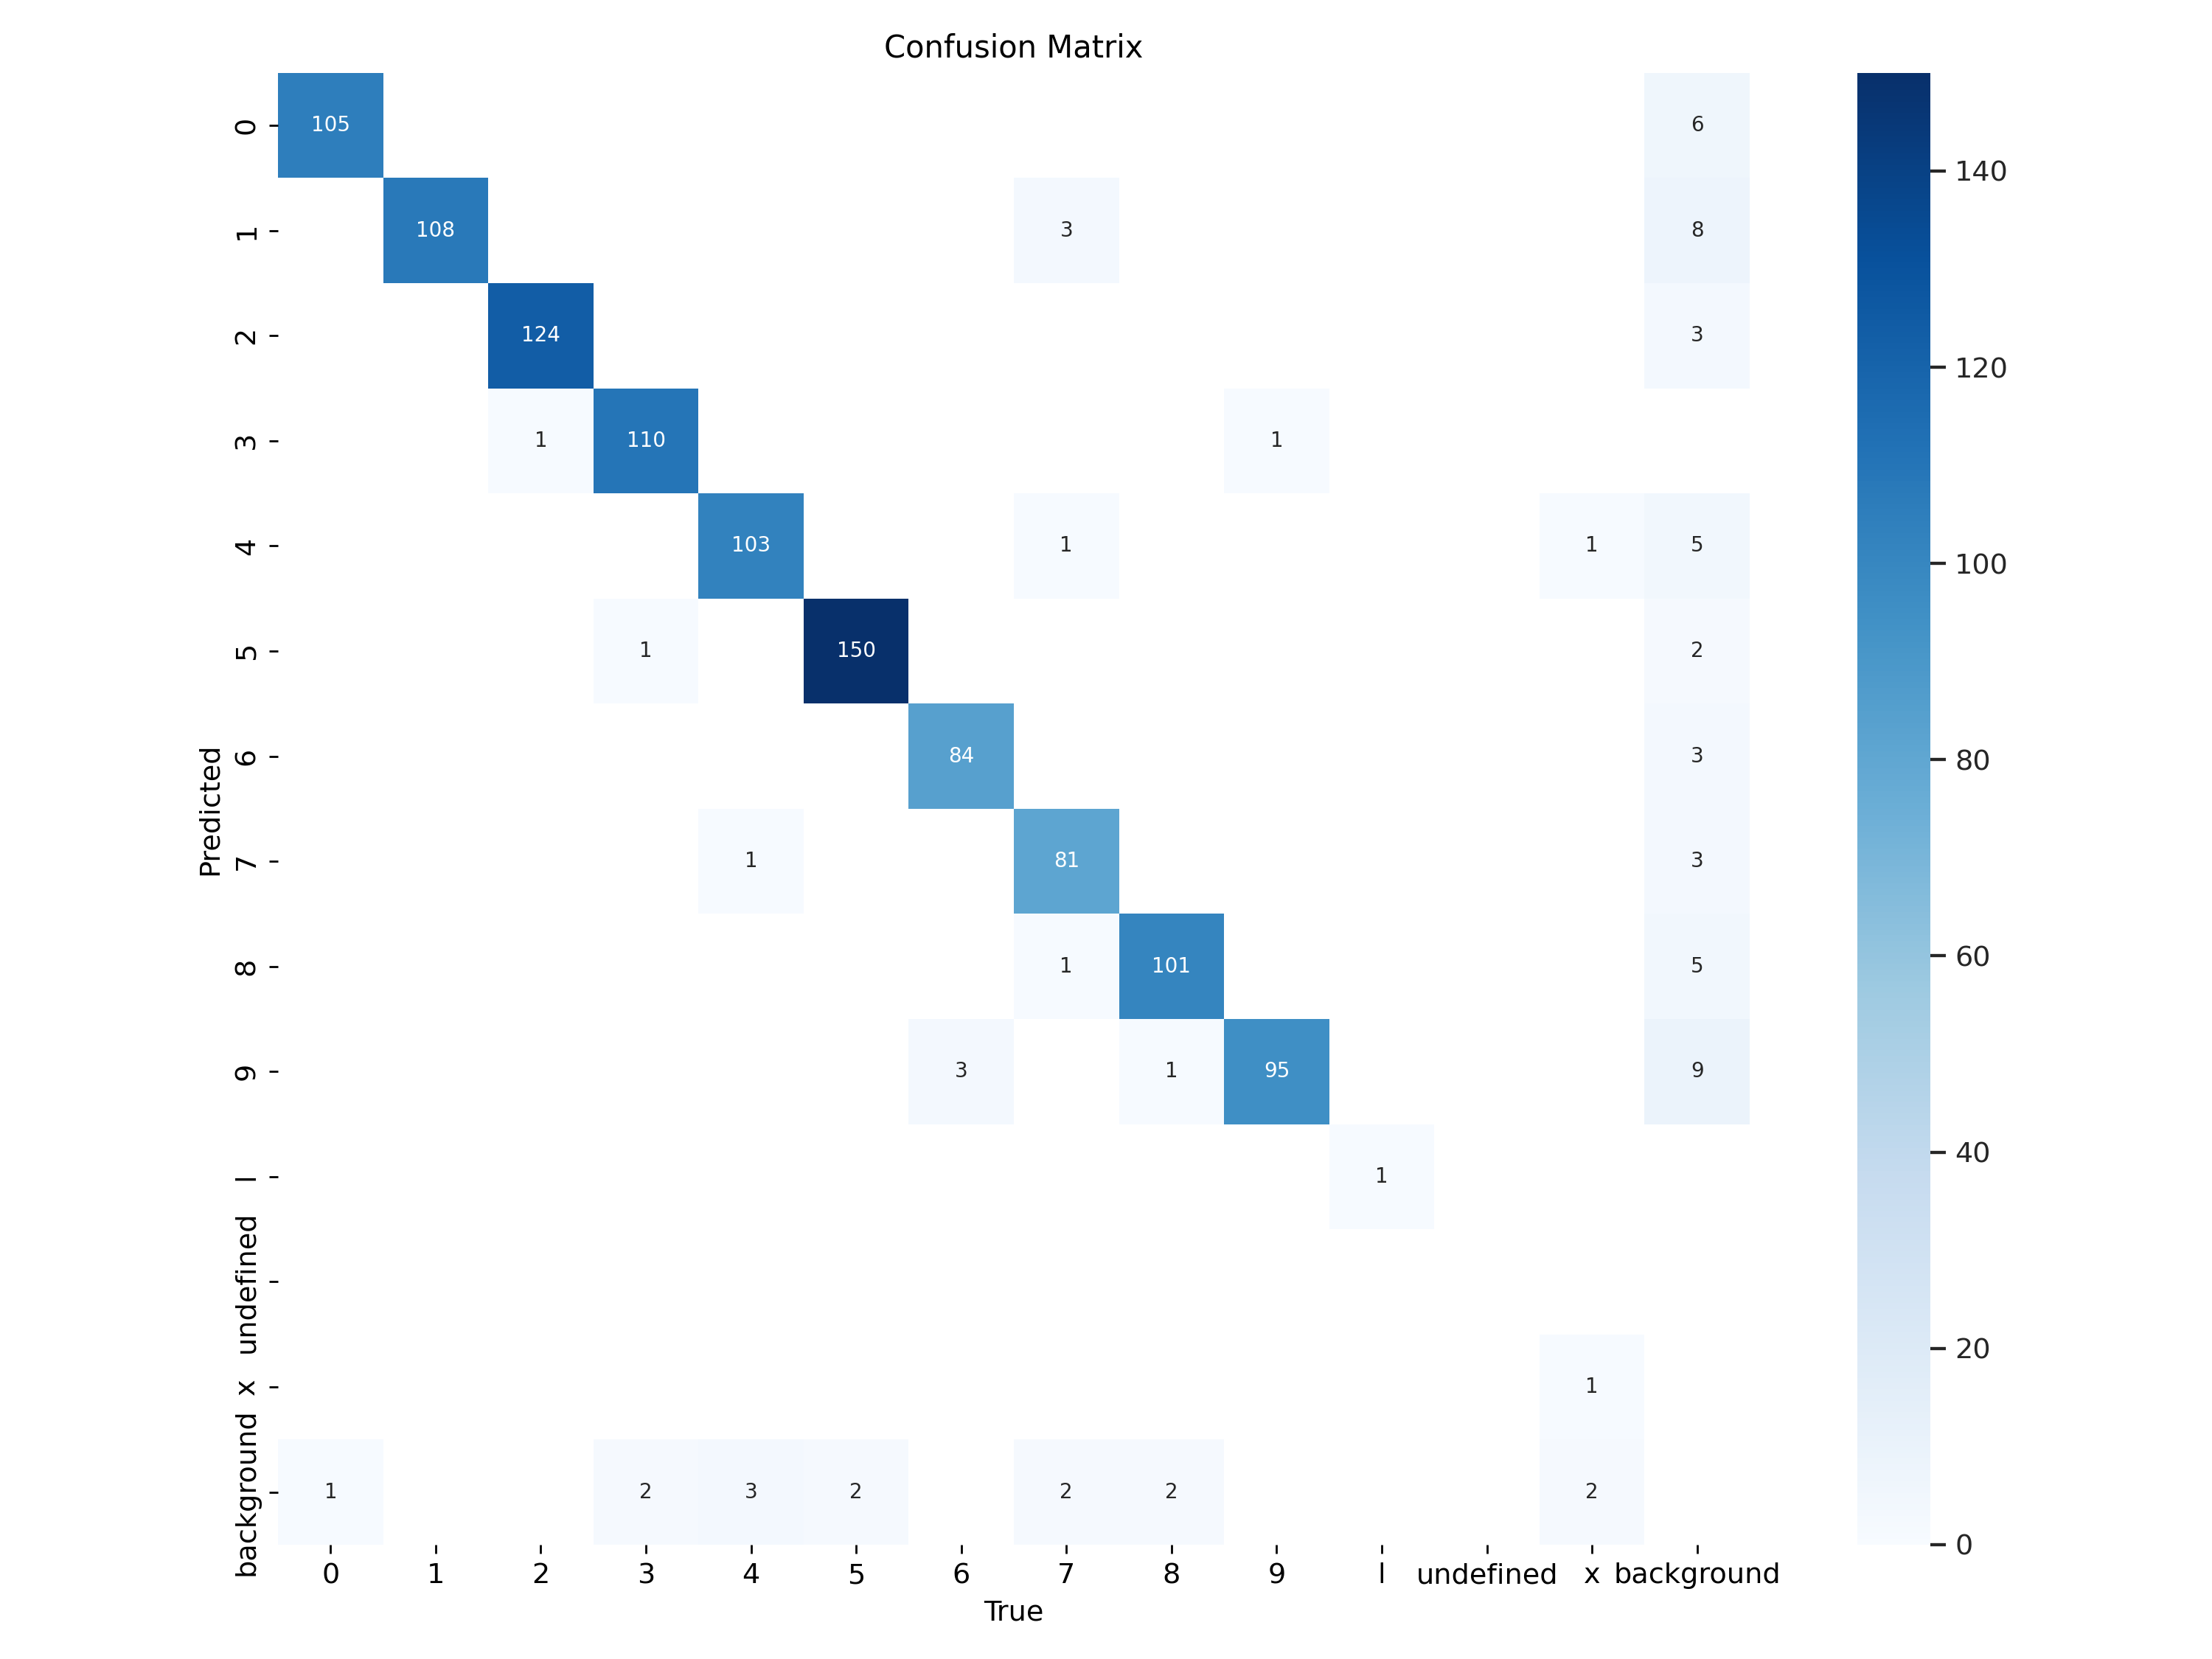

In [9]:
display(Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=1000))

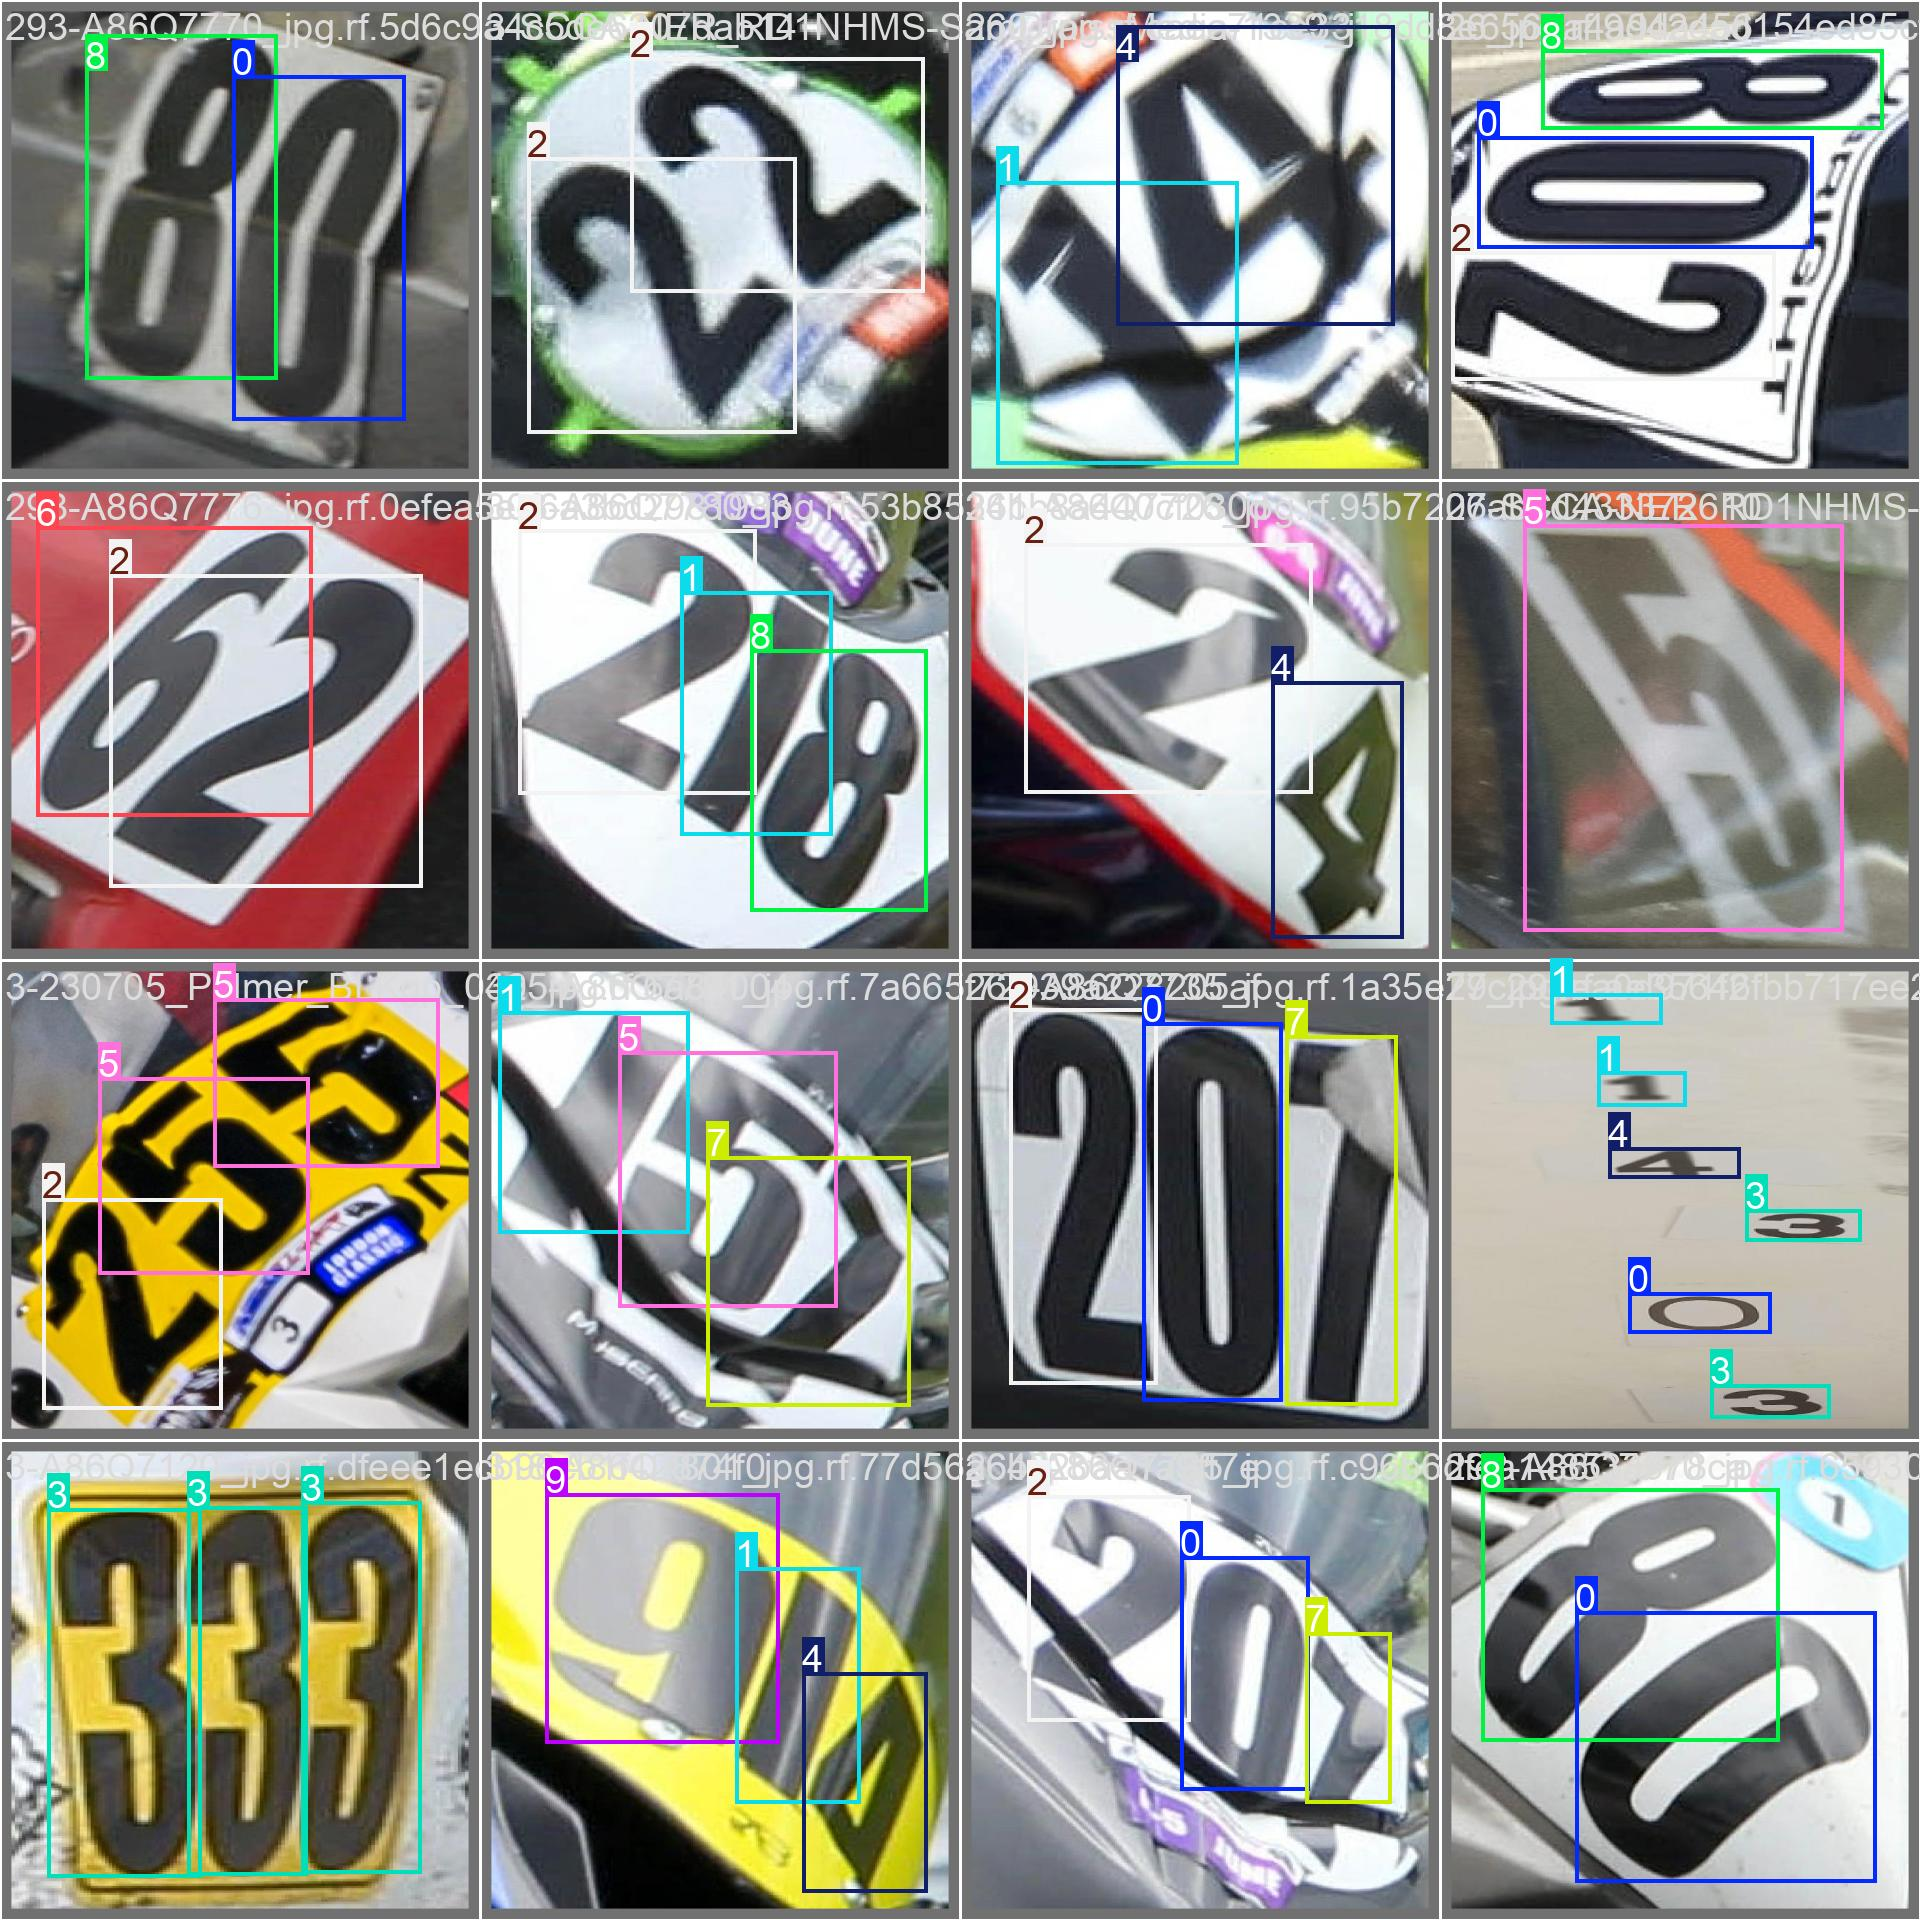

In [10]:
display(Image(filename=f"/content/runs/detect/train/val_batch2_labels.jpg", width=1000))

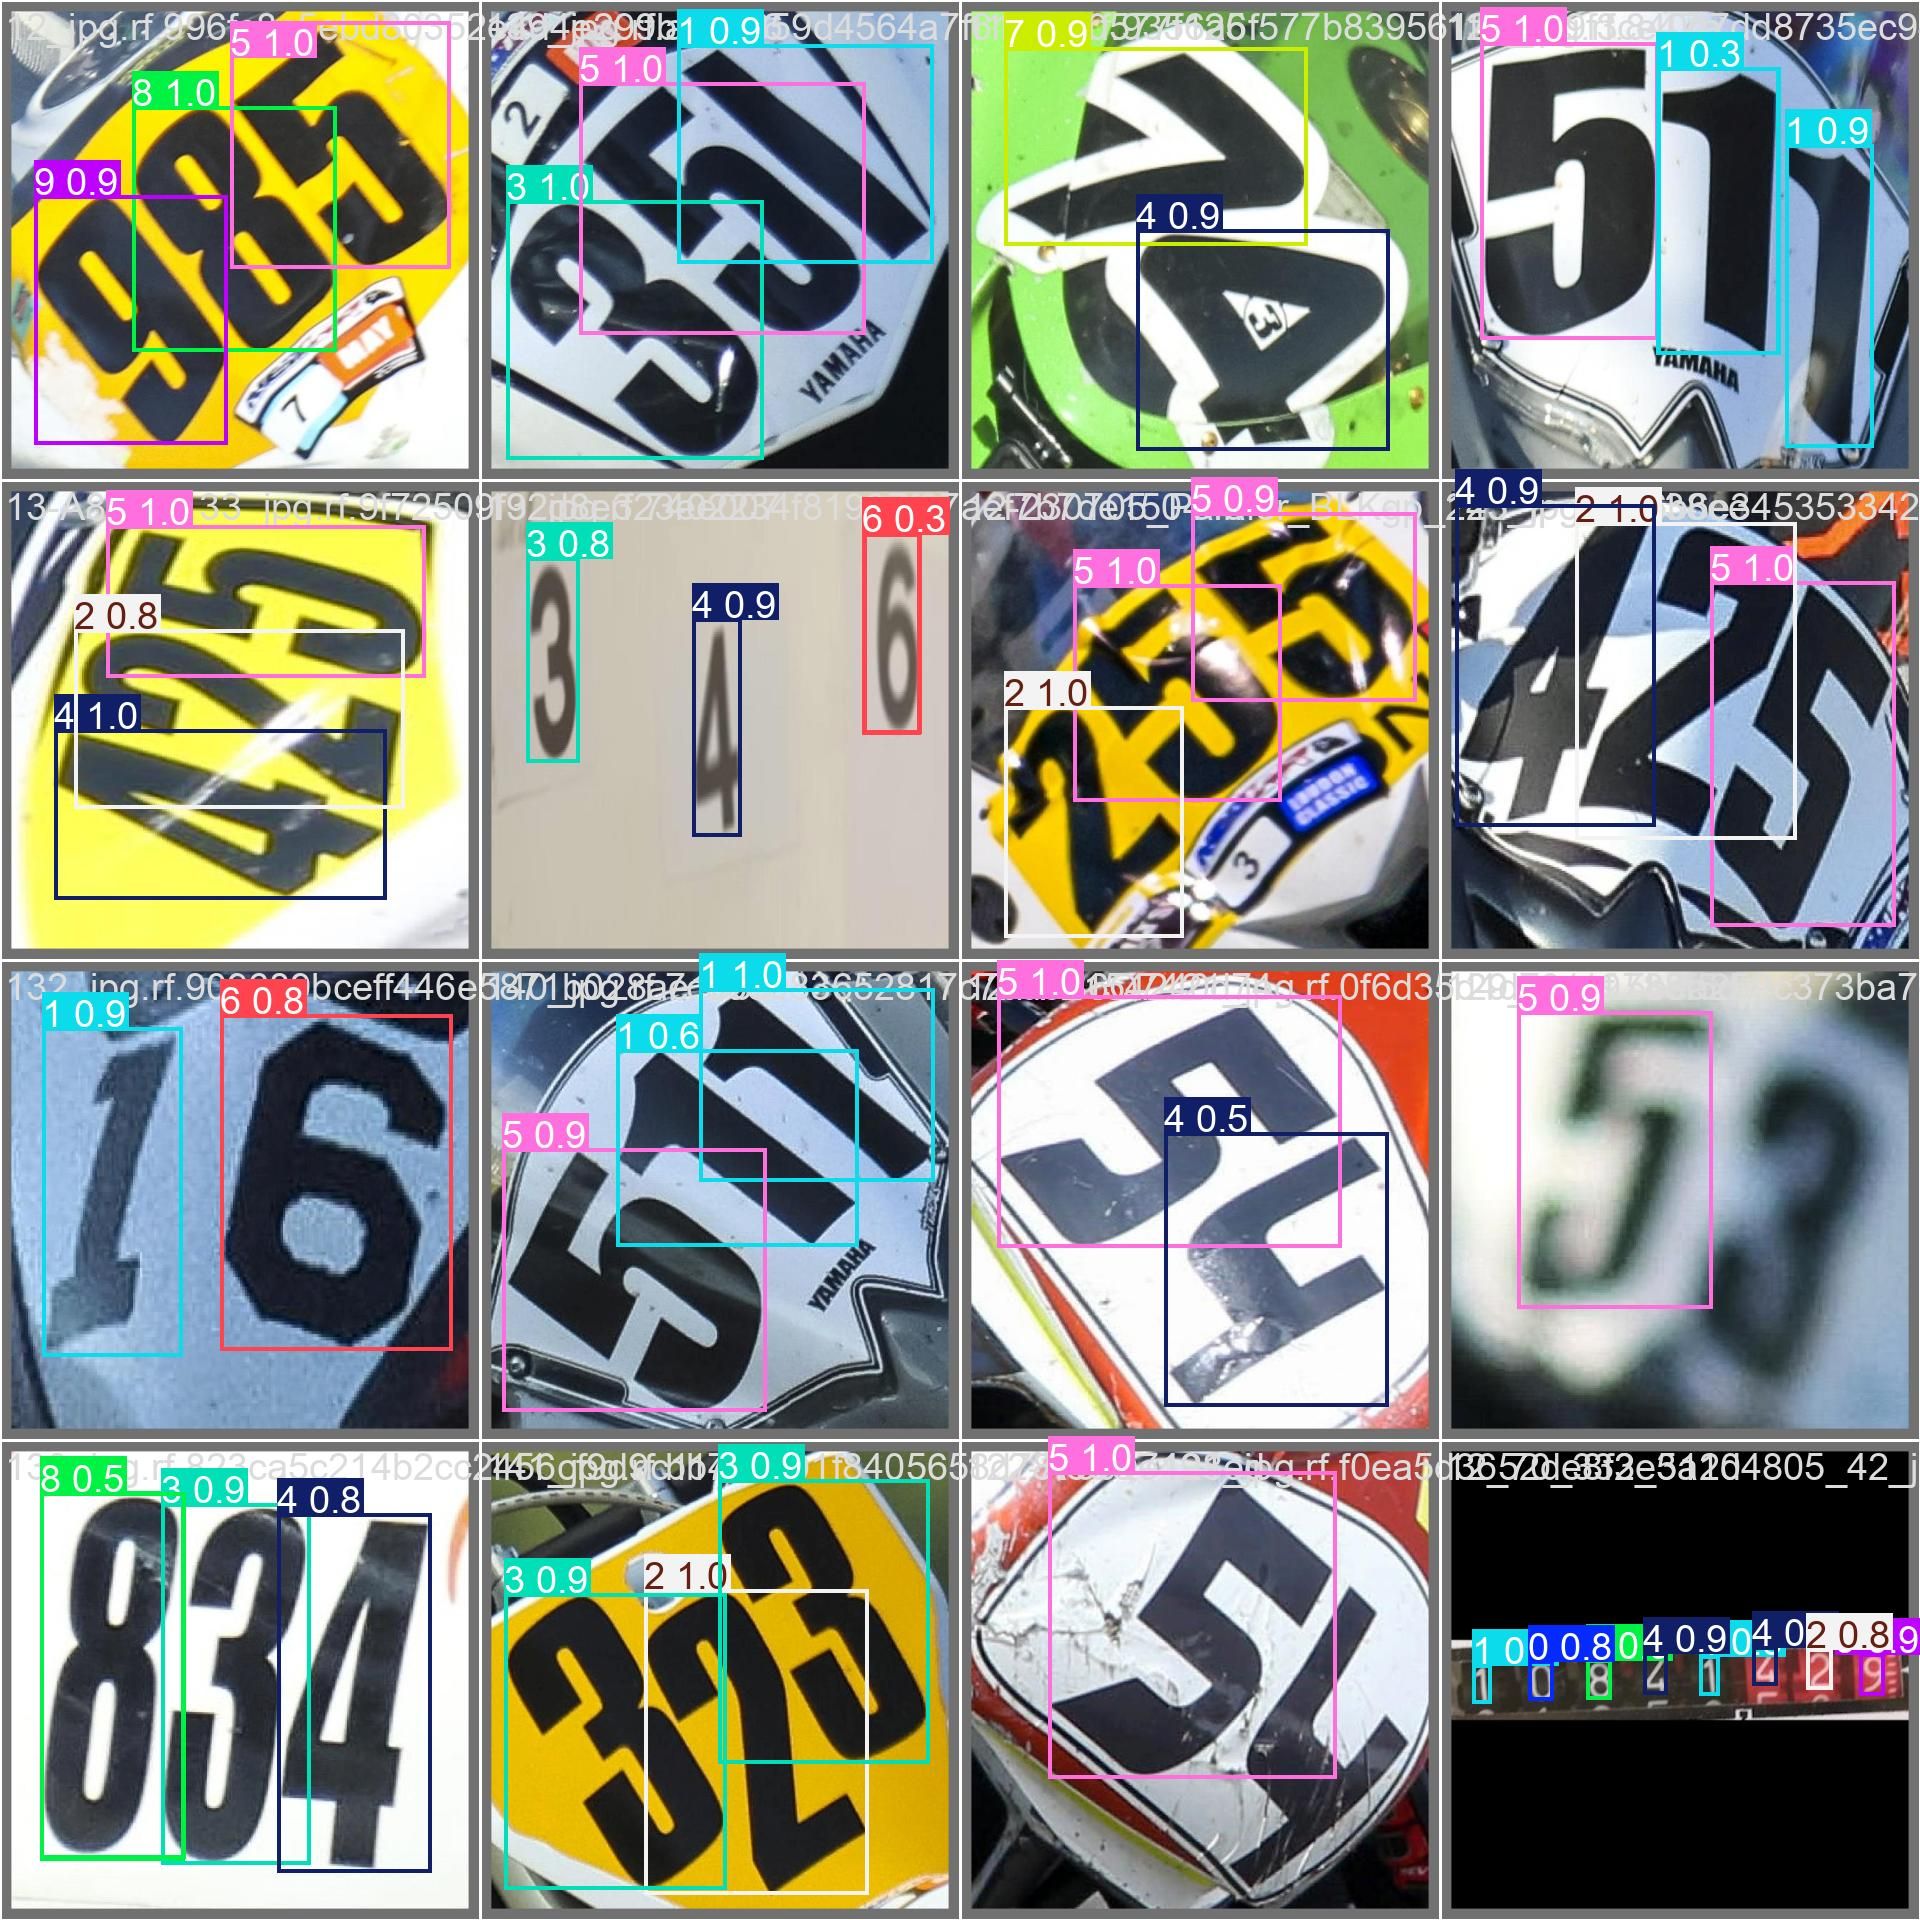

In [11]:
display(Image(filename=f"/content/runs/detect/train/val_batch1_pred.jpg", width=1000))

In [13]:
import pandas as pd
result=pd.read_csv("/content/runs/detect/train/results.csv")


In [15]:
result[:5]

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,121.428,3.01859,8.87924,3.46677,0.50026,0.44501,0.43192,0.30217,2.39474,3.60650,2.96794,0.000195,0.000195,0.000195
1,2,218.955,2.96012,4.71209,3.26927,0.73557,0.51170,0.60210,0.42572,1.93297,2.69492,2.42639,0.000365,0.000365,0.000365
2,3,314.218,2.99973,4.23812,3.24660,0.71419,0.58754,0.65432,0.45364,1.98400,2.49398,2.45607,0.000510,0.000510,0.000510
3,4,408.864,2.93502,3.98753,3.17560,0.83097,0.61662,0.71128,0.52777,1.66888,2.02057,2.26683,0.000472,0.000472,0.000472
4,5,501.579,2.85219,3.66373,3.08778,0.87430,0.69354,0.77034,0.56630,1.69213,1.83787,2.29446,0.000433,0.000433,0.000433


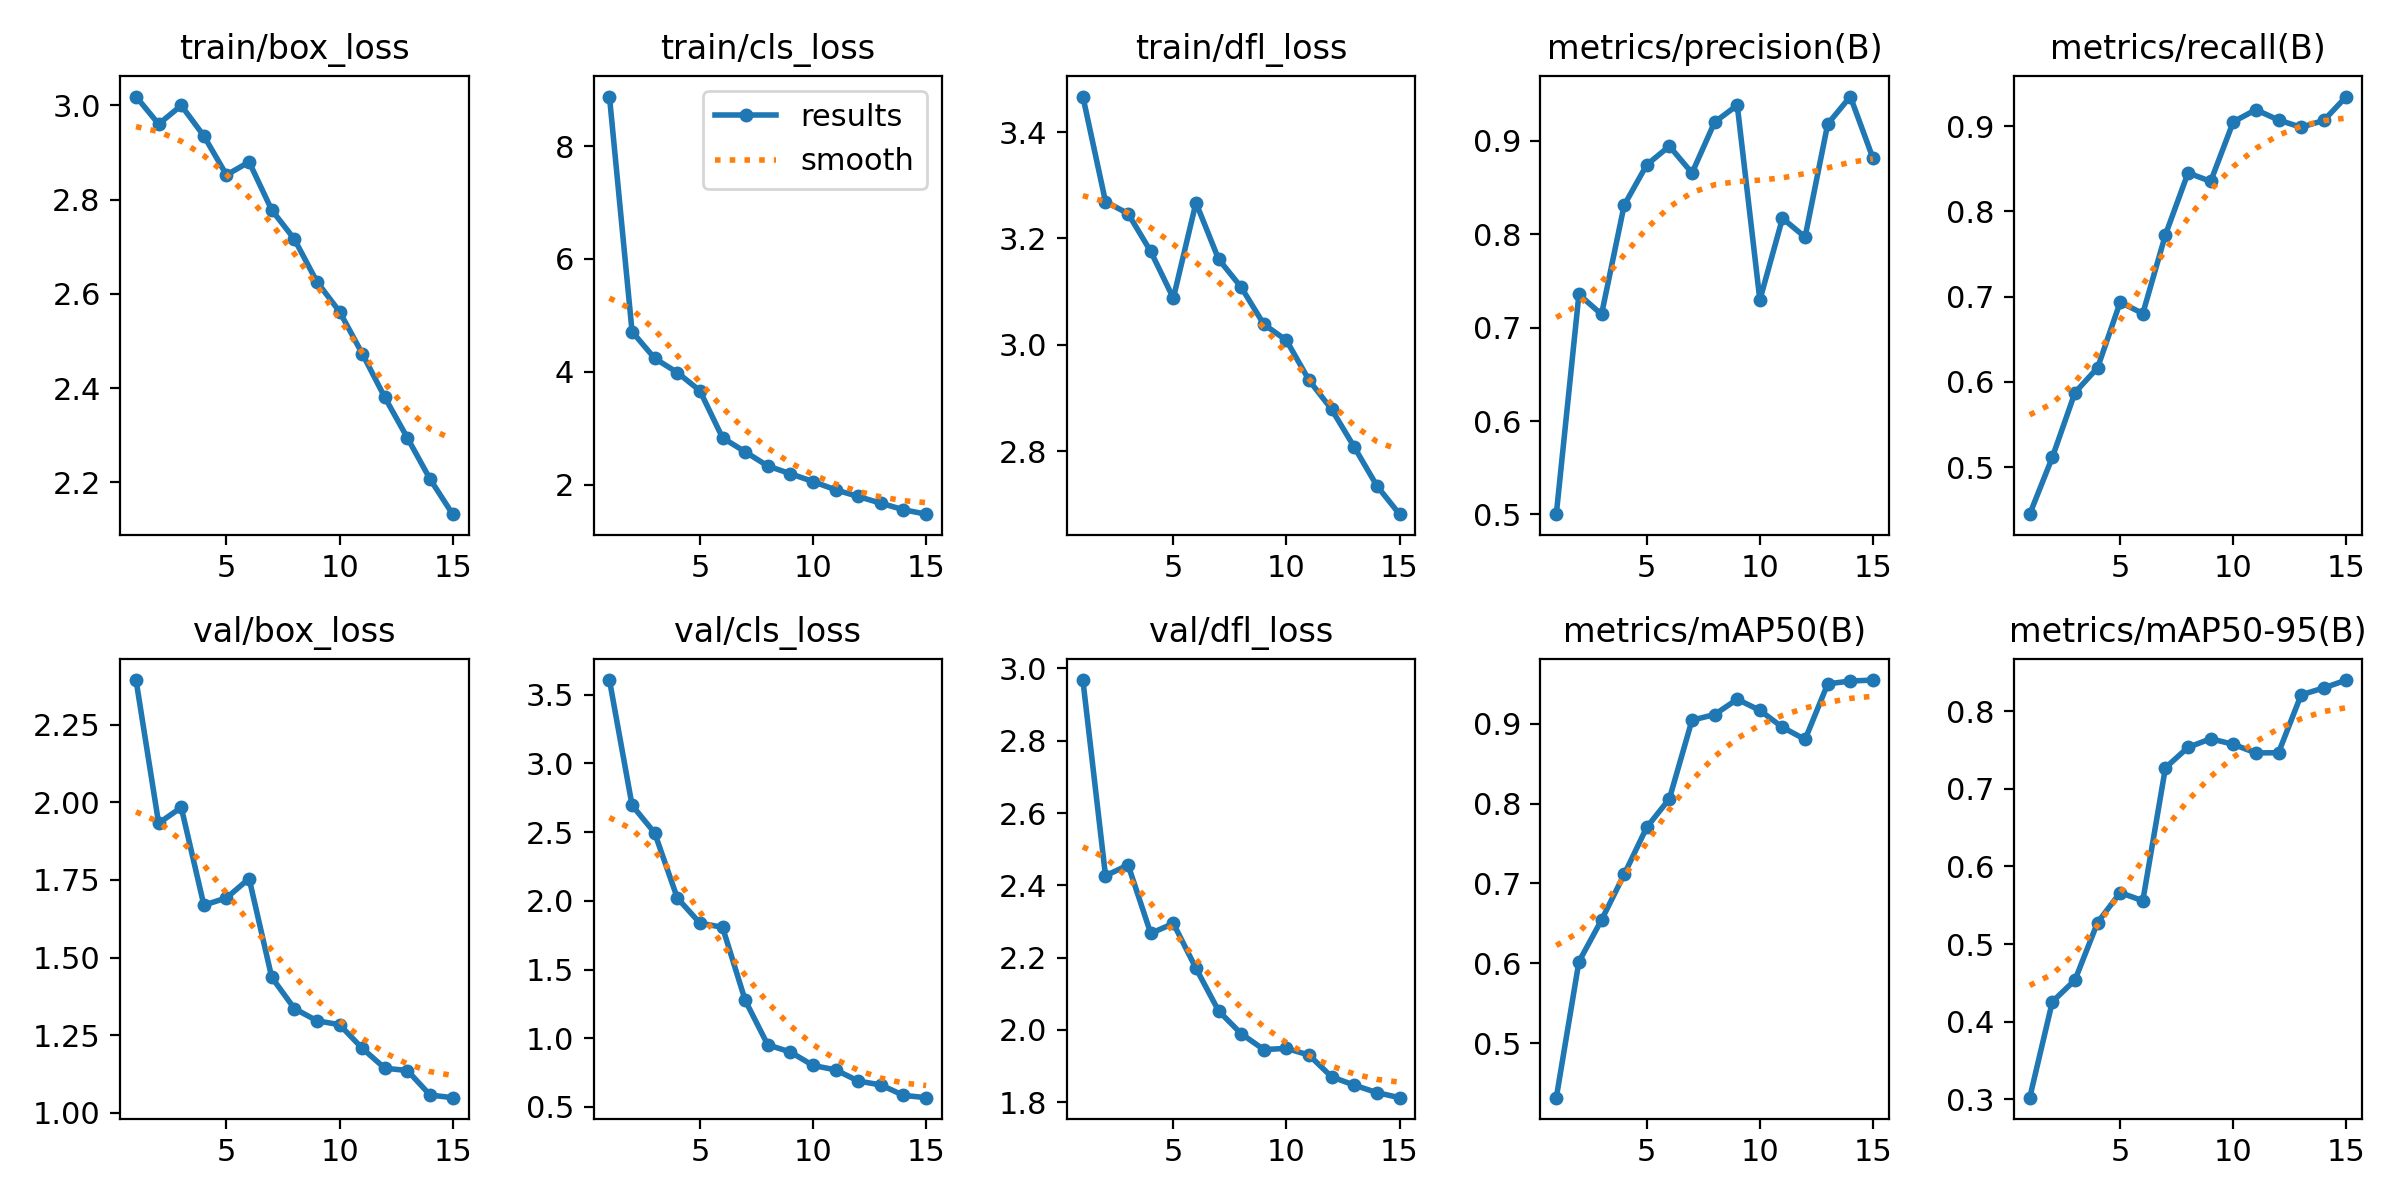

In [16]:
display(Image(filename=f"/content/runs/detect/train/results.png", width=1000))

In [17]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/content/number-1/test/images

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,045,022 parameters, 0 gradients, 24.5 GFLOPs

image 1/135 /content/number-1/test/images/0_jpg.rf.1064a913f3134394aa140633aed4a93e.jpg: 640x640 1 3, 1 7, 1 9, 17.3ms
image 2/135 /content/number-1/test/images/102_jpg.rf.9b0638b0ab2db73685cbf4ccd8073d5b.jpg: 640x640 1 2, 2 4s, 1 5, 2 6s, 2 8s, 17.3ms
image 3/135 /content/number-1/test/images/103-A86Q7394_jpg.rf.25890f0b95157d29ff0b0205d018abe7.jpg: 640x640 1 1, 1 4, 1 9, 17.2ms
image 4/135 /content/number-1/test/images/105_jpg.rf.f94cf3e013b3d41006b60864b72f73d4.jpg: 640x640 1 4, 1 6, 1 7, 1 8, 17.3ms
image 5/135 /content/number-1/test/images/12-SCCA-NER_RD1NHMS-SamDraissMedia-1425_jpg.rf.9a2bf7f8b6d0ca1f9e3aebdacddfd6e1.jpg: 640x640 1 1, 1 5, 17.2ms
image 6/135 /content/number-1/test/images/13-230705_Palmer_BLKgp_434_jpg.rf.c575595207d47d082c6eb37e9154df2f.jpg: 640x640 1 2, 2 5s, 17.2ms
image 7/135 /content/number-1/t

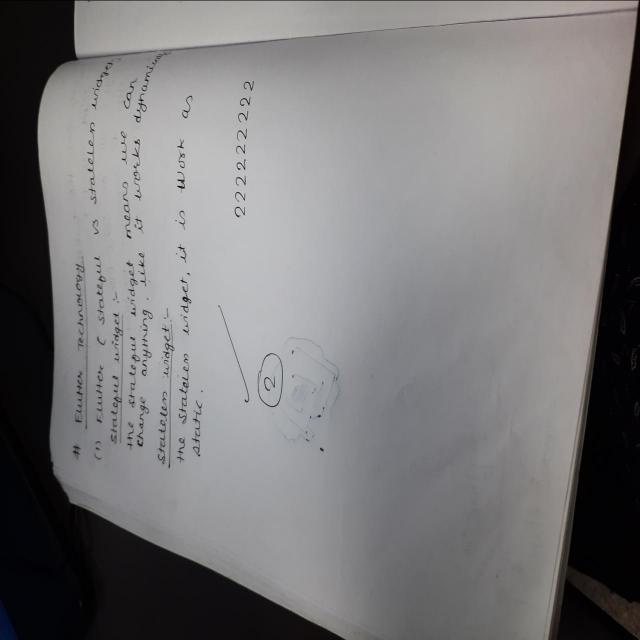

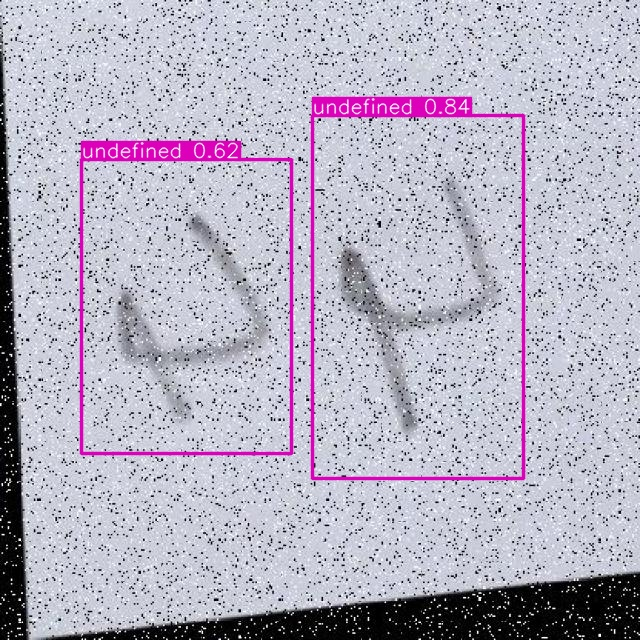

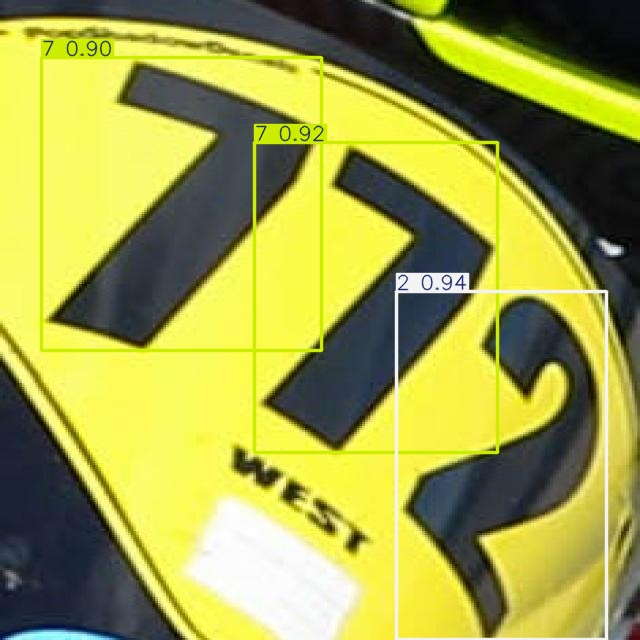

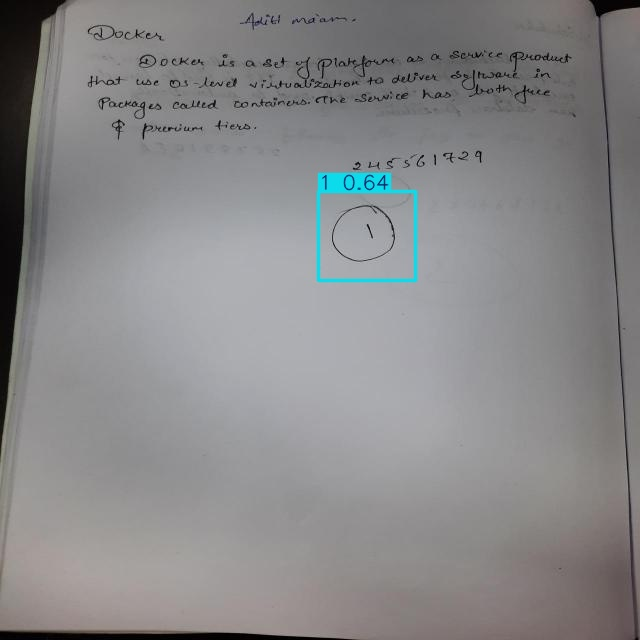

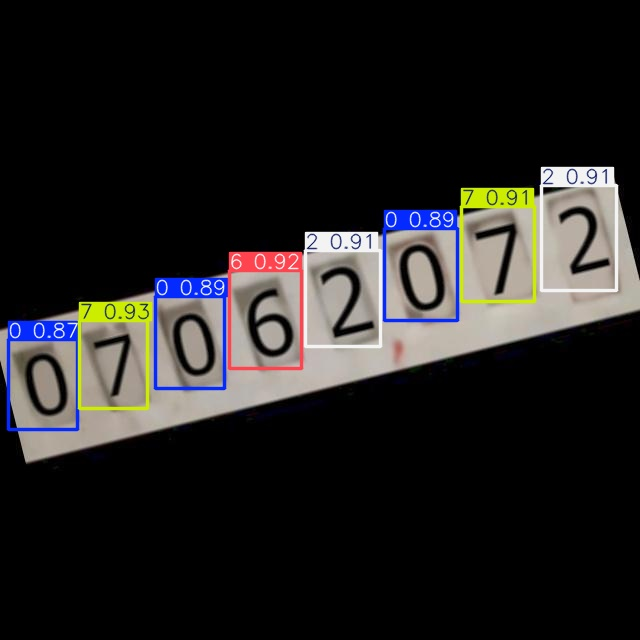

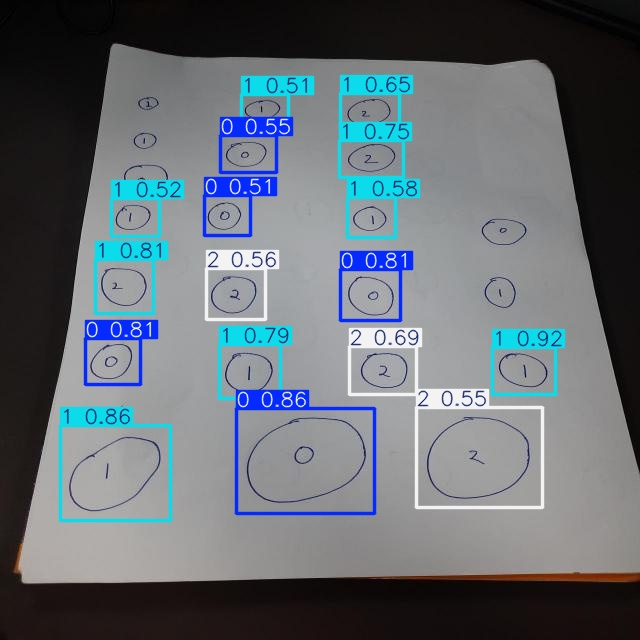

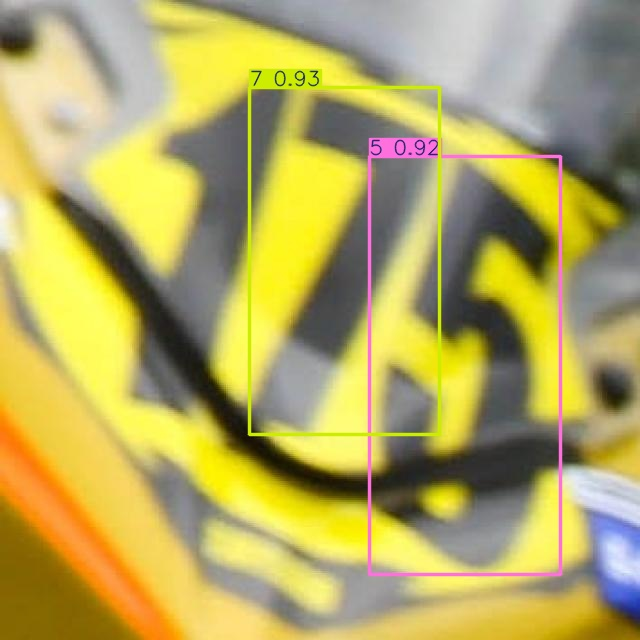

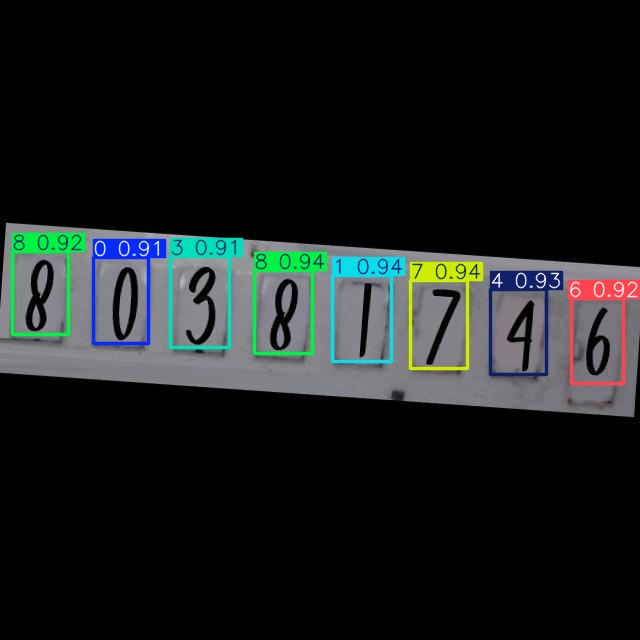

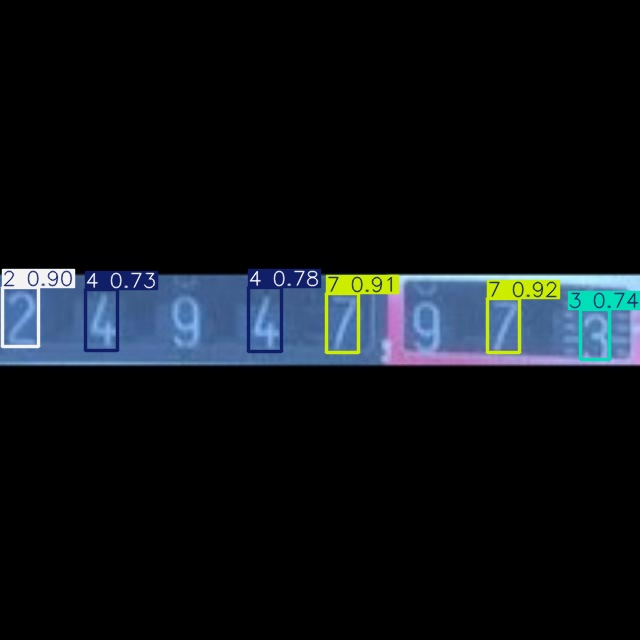

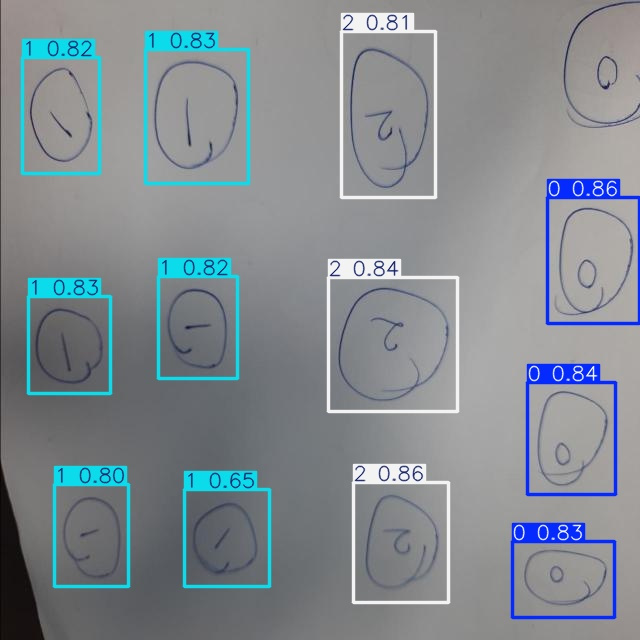

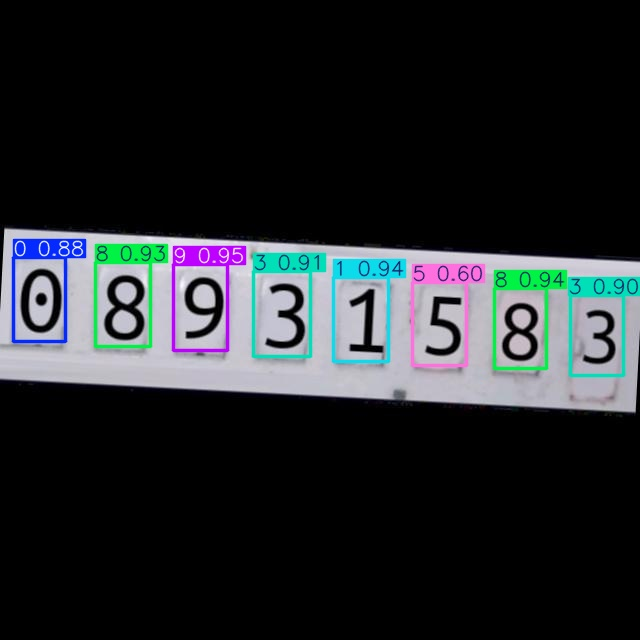

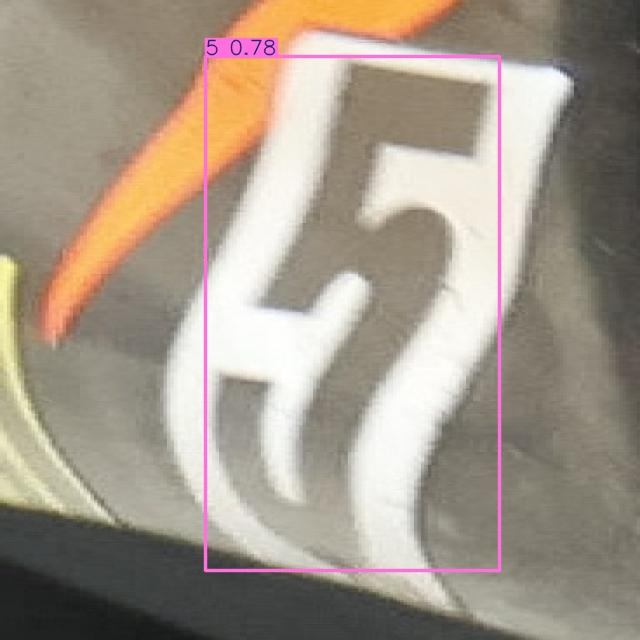

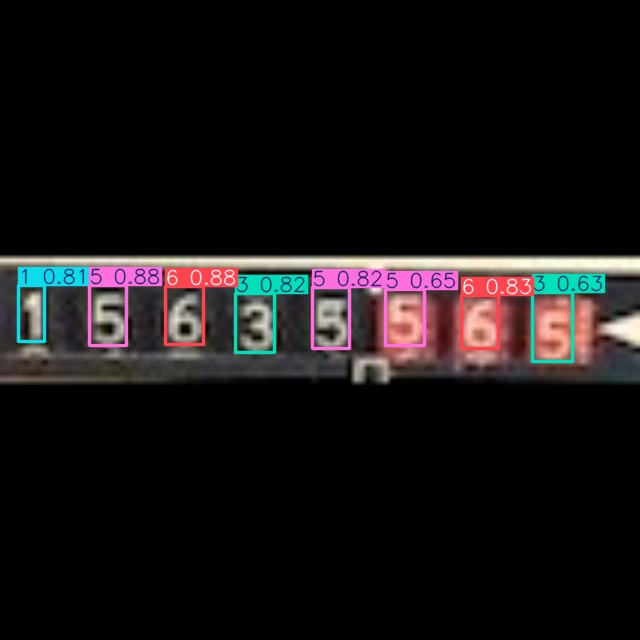

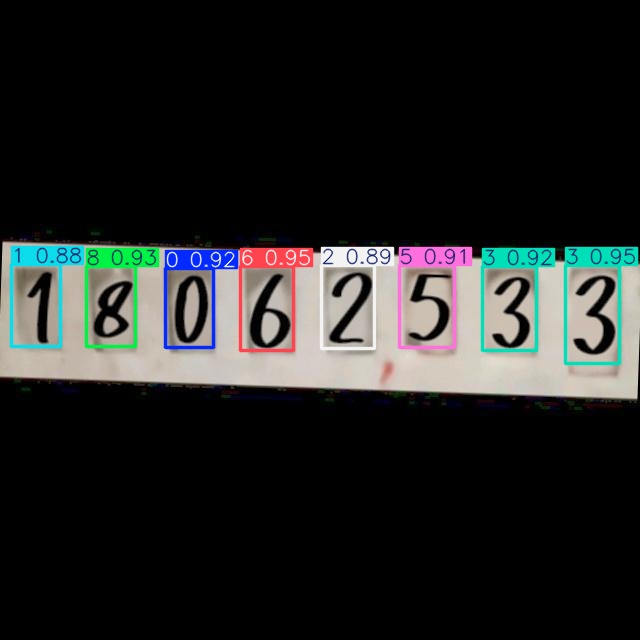

In [19]:
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/content/runs/detect/predict/*.jpg"): #assuming JPG
    if i %10 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1